# TME3 - Descente de gradient
---

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## Algorithme de descente de gradient
---

In [2]:
def optimize(fonc, dfonc, xinit, eps, max_iter):
    """ Algorithme du gradient avec :
        fonc : fonction
        dfonc : gradient de fonc
        xinit : point initial
        eps : pas de gradient
        max_iter : nombre d'itérations
    """
    
    X = np.zeros(tuple([max_iter]) + xinit.shape)
    X[0] = xinit # On initialise avec xinit
    dfX = np.zeros(X.shape) # valeurs du gradient stockés au fur et a mesure
    i = 0
    while i < max_iter-1:
        dfX[i] = dfonc(X[i])
        X[i+1] = X[i] - eps * dfX[i]
        i += 1
    dfX[i] = dfonc(X[i]) # dernière valeur du gradient
    
    return X, fonc(X), dfX

## Optimisation de fonctions
---

Définition des fonctions

In [30]:
def fonction1(x):
    """ Fonction à 1 dimension """
    return x * np.cos(x)

def fonction2(x):
    """ Fonction à 1 dimension """
    return -np.log(x) + x**2

def fonction3(x):
    """ Fonction à 2 dimensions """
    if type(x) == np.ndarray and len(x.shape) > 1:
        x1, x2 = x[:,0], x[:,1]
    else:
        x1, x2 = x[0], x[1]
    return 100 * (x1 - x2**2)**2 + (1 - x1)**2


Définition des gradients

In [5]:
def dfonction1(x):
    return -np.sin(x)*x + np.cos(x)

def dfonction2(x):
    return -1/x + 2*x

def dfonction3(x):
    x1, x2 = x[0], x[1]
    return np.array([200*(x1 - x2**2)*x1 - 2*(1 - x1), \
                    -400*(x1 - x2**2)*x2])


Affichage 2d

In [20]:
def afficher1d(x_histo, f_histo, grad_histo):
    plt.figure(figsize=(9,5))
    plt.plot(range(iterations), x_histo, label="x")
    plt.plot(range(iterations), f_histo, label="f(x)")
    plt.plot(range(iterations), grad_histo, label="f'(x)")
    plt.legend()
    plt.show()
    
def afficheLogDifference(x_histo):
    """ affiche la courbe (t,log(||xt−x∗||)), avec x∗la valeur optimale atteinte """
    t = range(len(x_histo)-1)
    
    vals = np.log(np.abs(x_histo - x_histo[-1])[:-1])
    plt.plot(t, vals, color="r")
    plt.show()
    
#afficheLogDifference(x_histo)

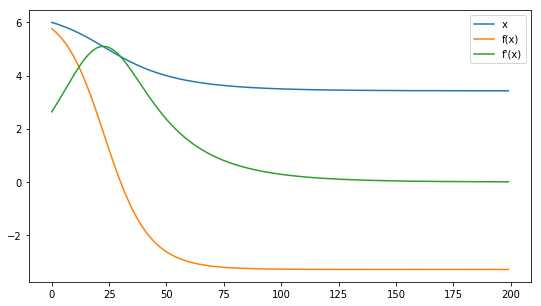

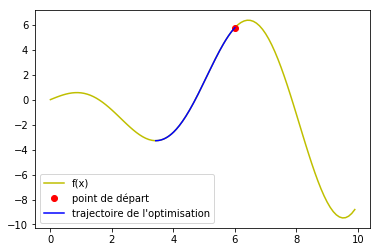

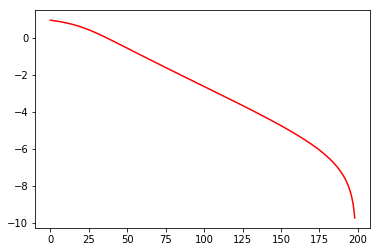

In [7]:
iterations = 200
eps = 0.01
xinit = np.array([6])

x_histo, f_histo, grad_histo = optimize(fonction1, dfonction1, xinit, eps, iterations)
afficher1d(x_histo, f_histo, grad_histo)

## fonction1 et trajectoire de l'optimisation
abscisses = np.arange(0., 10., 0.1)
plt.plot(abscisses, fonction1(abscisses), color="y", label="f(x)")
plt.plot(x_histo[0], f_histo[0], "o", color="r", label="point de départ")
plt.plot(x_histo, f_histo, color="b", label="trajectoire de l'optimisation")
plt.legend()
plt.show()

afficheLogDifference(x_histo)

Test avec un epsilon assez grand

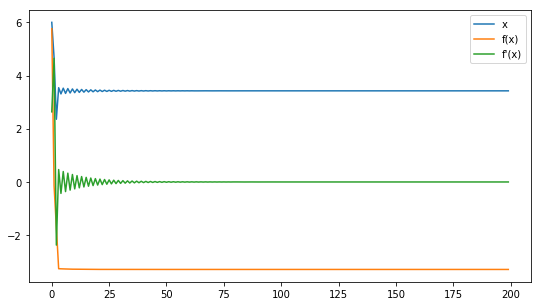

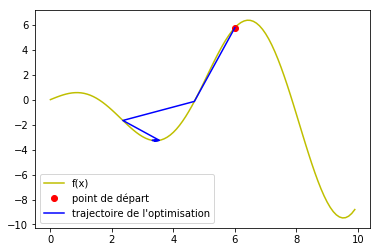

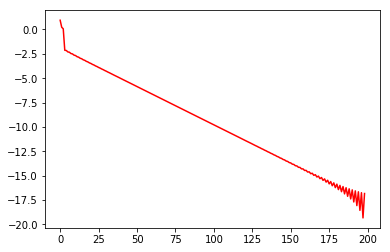

In [176]:
eps = 0.5

x_histo, f_histo, grad_histo = optimize(fonction1, dfonction1, xinit, eps, iterations)
afficher1d(x_histo, f_histo, grad_histo)

## fonction1 et trajectoire de l'optimisation
abscisses = np.arange(0., 10., 0.1)
plt.plot(abscisses, fonction1(abscisses), color="y", label="f(x)")
plt.plot(x_histo[0], f_histo[0], "o", color="r", label="point de départ")
plt.plot(x_histo, f_histo, color="b", label="trajectoire de l'optimisation")
plt.legend()
plt.show()

afficheLogDifference(x_histo)

#### Remarque 
Pour la dernière courbe, lorsque epsilon est assez bas (0.01), la courbe "descend" progressivement et tend vers - l'infini.
Plus epsilon grandit, plus on aperçoit une courbe qui oscille lorsque la différence entre xt et x* diminue

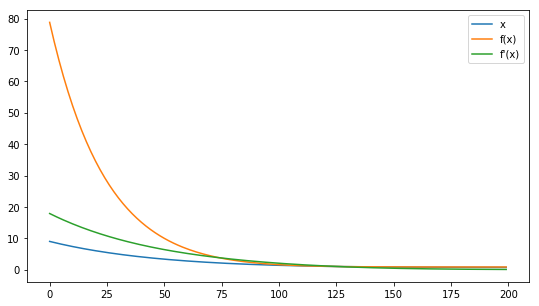

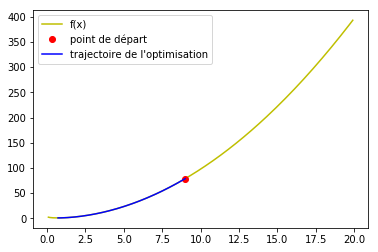

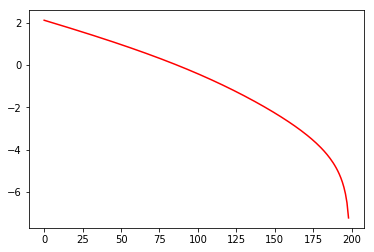

In [171]:
iterations = 200
eps = 0.01
xinit = np.array([9])

x_histo, f_histo, grad_histo = optimize(fonction2, dfonction2, xinit, eps, iterations)
afficher1d(x_histo, f_histo, grad_histo)

## fonction2 et trajectoire de l'optimisation
abscisses = np.arange(0.1, 20., 0.1)
plt.plot(abscisses, fonction2(abscisses), color="y", label="f(x)")
plt.plot(x_histo[0], f_histo[0], "o", color="r", label="point de départ")
plt.plot(x_histo, f_histo, color="b", label="trajectoire de l'optimisation")
plt.legend()
plt.show()

afficheLogDifference(x_histo)

Affichage 3d

In [114]:
iterations = 200
eps = 0.01
xinit = np.array([1,1])

x_histo, f_histo, grad_histo = optimize(fonction3, dfonction3, xinit, eps, iterations)

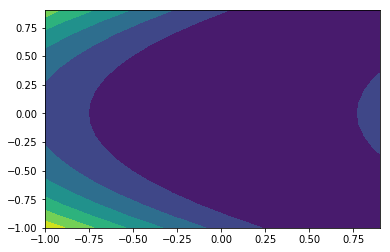

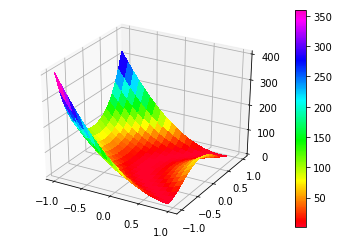

In [118]:
def make_grid(data=None, xmin=-5, xmax=5, ymin=-5, ymax=5, step=20):
    if data is not None:
        xmin, xmax, ymin, ymax = np.min(data[:,0]), np.max(data[:,0]),\
                                np.min(data[:,1]), np.max(data[:,1])
    x, y = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)*1./step),
                      np.arange(ymin, ymax, (ymax-ymin)*1./step))
    grid = np.c_[x.ravel(), y.ravel()]
    return grid, x, y

## Grille de discrétisation
grid, xx, yy = make_grid(xmin=-1, xmax=1, ymin=-1, ymax=1)

## Affichage 2D
plt.contourf(xx, yy, fonction3(grid).reshape(xx.shape))
fig = plt.figure()

## construction d'un referentiel 3d
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, fonction3(grid).reshape(xx.shape), rstride=1, cstride=1,\
                    cmap=cm.gist_rainbow, linewidth=0, antialiased=False)
fig.colorbar(surf)
ax.plot(x_histo[:, 0], x_histo[:,1], f_histo.ravel(), color='black')

## Modelisation de la trajectoire de l'optimisation
## A faire

plt.show()

In [37]:
x = [1,2,3]
y= [1,2,5]
[X,Y] = np.meshgrid(x,y)

In [38]:
[X,Y]

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[1, 1, 1],
        [2, 2, 2],
        [5, 5, 5]])]

In [39]:
X

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [40]:
Y

array([[1, 1, 1],
       [2, 2, 2],
       [5, 5, 5]])

In [41]:
[X,Y] = np.meshgrid(x)

ValueError: not enough values to unpack (expected 2, got 1)

## Régression logistique
---

#### Classifieur - descente de gradient pour la régression logistique

In [179]:
class Classifier:
    def score(datax, datay):
        return len(np.where(predict(datax) == datay)[0])/len(X)

In [182]:
class RegLogisticClassifier(Classifier):
    def __init__(self, nbIterations, eps):
        self.iterations = nbIterations
        self.eps = eps
    
    def fit(self, datax, datay):
        return
    
    def predict(datax):
        return

In [ ]:
class regressionLogistique:
    def __init__(self, nb_it, grad):
        self.nb_it = nb_it
        self.grad = grad
        
    def fit(self, datax):
        w0 = [1 for i in range(len(datax[0])+1)]
        x, f, df = optimize_log(fw, dfw, w0, self.grad, self.nb_it, datax)
        self.w_et = x[len(x)-1]
        #print("self.w_et", self.w_et)
    
    def predict(self, datax):
        fw = []
        tmpt = []
        for i in range(len(datax)):
            tmp = self.w_et[0] + np.vdot(self.w_et[1:], datax[i])
            mu = 1.0/(1+ math.exp(-tmp))
            print("mu",mu)
            tmpt.append(tmp)
            if(mu < 1):
                fw.append(-1)
            else:
                fw.append(1)
        self.pred = fw
        #print("self.pred",self.pred)
        print("tmpt",max(tmpt))
        
    def accuracy(self, datay):
        scor = 0
        #print("datay", datay)
        for i in range(len(datay)):
            if(self.pred[i] == datay[i]):
                scor += 1
        return scor*1.0/len(datay)

In [183]:
class NaiveBayesianClassifier(Classifier):
    def __init__(self):
        return
    
    def fit(self, datax, datay):
        return
    
    def predict(datax):
        return